INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:werkzeug: * Running on http://localhost:9500/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [27/May/2021 15:38:52] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/May/2021 15:38:52] "GET /static/fund.png HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [27/May/2021 15:38:52] "GET /favicon.ico HTTP/1.1" 404 -


<Figure size 1440x432 with 0 Axes>

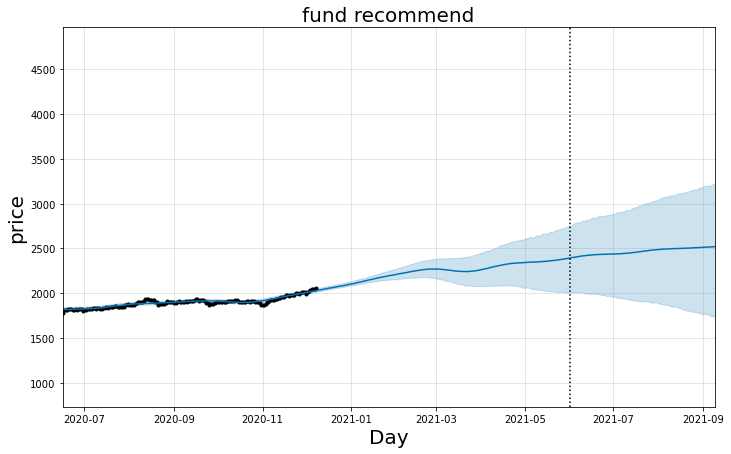

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from werkzeug.wrappers import Request, Response
from flask import Flask, send_file
%matplotlib inline

app = Flask(__name__)
# csv 읽어서 그래프 만들기
df = pd.read_csv('fund_199.csv')
df = df[['date', 'rate']].dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
daily_df = df.resample('d').mean()
d_df = daily_df.reset_index().dropna()

d_df.columns = ['ds', 'y']
fig = plt.figure(facecolor='w', figsize=(20, 6))

m = Prophet()
m.fit(d_df)
future = m.make_future_dataframe(periods=500) # 미래 500일까지 더 예측
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#미래 예측
from datetime import datetime, timedelta
fig1 = m.plot(forecast)
#datenow = datetime.now()
datenow = datetime(2021, 6, 1)
dateend = datenow + timedelta(days=100)
datestart = dateend - timedelta(days=450)

plt.xlim([datestart, dateend])
plt.title("fund recommend", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.rcParams["figure.figsize"] = (7,4)
plt.savefig('static/fund.png', bbox_inches = 'tight', pad_inches = 0) #무조건 plt.show이전에
#plt.show()

#matplotlib 크기조절
#fig = plt.gcf() #현재 figure에 불러오기
#fig.set_size_inches(5, 6) #크기 바꾸기(inch 단위)


@app.route("/")
def hello():
    return send_file("predict.html")

if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9500, app)